## **"KPIs Estratégicos: Tecnología, Penetración y Crecimiento Económico"**  
En este notebook, desarrollaré cuatro indicadores clave de desempeño para analizar tendencias relacionadas con el acceso a internet y su impacto:  **KPI de Aumento del Acceso a Internet por Provincia, KPI de Crecimiento de Accesos a Internet por Tecnología, KPI de Penetración del Servicio de Internet por Población, KPI de Variación de Ingresos.**  
Estos KPIs permitirán evaluar la conectividad tecnológica, su alcance poblacional y los efectos económicos asociados, proporcionando información estratégica para la toma de decisiones.  

### **Librerías**

Importo las librerías necesarias para el análisis y manejo de archivos.

In [1]:
import pandas as pd
import openpyxl
import os
import warnings
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

#### **Manejo de Warnings**

Se implementará el manejo de warnings para suprimir mensajes no críticos durante el procesamiento de datos, asegurando una salida limpia y centrada en los resultados importantes.

In [2]:
# Ignorar warnings no críticos para mantener la salida limpia
warnings.filterwarnings("ignore")

#### **Rutas**  

In [3]:
# Cargar el archivo

# KPI_Aumento_Acceso = KPI de Aumento del Acceso a Internet por Provincia
# Penetración-Hogares:
ruta1 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetracion-hogares.csv'
df_hogares = pd.read_csv(ruta1)

# KPI_Crecimiento = KPI de Crecimiento de Accesos a Internet por Tecnología
# Accesos Por Tecnología:
ruta2 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Accesos Por Tecnología.csv'
df_accesos = pd.read_csv(ruta2)

# KPI_Penetración = KPI de Penetración del Servicio de Internet por Población
# Penetración-Población: 
ruta3 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetración-poblacion.csv'
df_poblacion = pd.read_csv(ruta3)  

# Totales Accesos Por Tecnología:
ruta4 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Totales Accesos Por Tecnología.csv'
df_TotalesAccesos = pd.read_csv(ruta4) 

# KPI_Ingresos = KPI de variación de ingresos
# Ingresos: 
ruta5 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Ingresos .csv'
df_ingresos = pd.read_csv(ruta5)



---

#### **Cálculo del KPI de Aumento del Acceso a Internet por Provincia**
Este análisis busca calcular el KPI de aumento de acceso a Internet por provincia con una proyección de crecimiento del 2%.

- **Preparación de datos**: Ordenados por provincia, año y trimestre para análisis secuencial.
- **Proyección de acceso**: Se aplicó un incremento del 2% a "Accesos por cada 100 hogares".
- **Cálculo del KPI**: **KPI = ((Acceso proyectado - Acceso actual) / Acceso actual) * 100**.

- **Resultado**: Se añaden las columnas KPI_Aumento_Acceso y Cumple_Meta_2% para indicar el cumplimiento de la meta.

#### Ruta del archivo CSV Limpio

In [4]:
# Penetración-Hogares:
ruta1 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetracion-hogares.csv'

#### **DataFrame original ordenado**

In [5]:
# Cargar el archivo CSV en df_hogares
df_hogares = pd.read_csv(ruta1)

# Ordenar el DataFrame por 'Provincia', 'Año', y 'Trimestre'
df_hogares.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, True, True], inplace=True)

# Mostrar el DataFrame original, ordenado pero sin modificaciones
print("DataFrame Original Ordenado:\n")
print(df_hogares[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']].head(5))


DataFrame Original Ordenado:

      Año  Trimestre     Provincia  Accesos por cada 100 hogares
984  2014          1  Buenos Aires                     54.570073
960  2014          2  Buenos Aires                     55.061417
936  2014          3  Buenos Aires                     56.754739
912  2014          4  Buenos Aires                     56.094337
888  2015          1  Buenos Aires                     56.370484


#### **Cálculo del KPI y Creación de Columnas Adicionales en el DataFrame**

In [6]:
# Inicializar la columna KPI como vacía 
df_hogares['KPI_Aumento_Acceso'] = None  

for provincia in df_hogares['Provincia'].unique():
    df_provincia = df_hogares[df_hogares['Provincia'] == provincia].sort_values(by=['Año', 'Trimestre'])
    
    for i in range(1, len(df_provincia)):
        acceso_actual = df_provincia.iloc[i - 1]['Accesos por cada 100 hogares']
        nuevo_acceso = df_provincia.iloc[i]['Accesos por cada 100 hogares']
        
        # Calcular KPI y asignarlo en la fila correspondiente
        kpi = ((nuevo_acceso - acceso_actual) / acceso_actual) * 100
        df_hogares.loc[(df_hogares['Provincia'] == provincia) & 
                       (df_hogares.index == df_provincia.index[i]), 'KPI_Aumento_Acceso'] = kpi

# Evaluar si el KPI cumple el 2% esperado
df_hogares['Cumple_Meta_2%'] = df_hogares['KPI_Aumento_Acceso'] >= 2

# Mostrar el DataFrame modificado
print("\nDataFrame Modificado con KPI_Aumento_Acceso y Cumple_Meta_2%:\n")
print(df_hogares[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares', 
                      'KPI_Aumento_Acceso', 'Cumple_Meta_2%']].head(5))



DataFrame Modificado con KPI_Aumento_Acceso y Cumple_Meta_2%:

      Año  Trimestre     Provincia  Accesos por cada 100 hogares  \
984  2014          1  Buenos Aires                     54.570073   
960  2014          2  Buenos Aires                     55.061417   
936  2014          3  Buenos Aires                     56.754739   
912  2014          4  Buenos Aires                     56.094337   
888  2015          1  Buenos Aires                     56.370484   

    KPI_Aumento_Acceso  Cumple_Meta_2%  
984               None           False  
960           0.900391           False  
936           3.075334            True  
912          -1.163608           False  
888           0.492292           False  


El DataFrame contiene dos indicadores clave: 
- **KPI_Aumento_Acceso**: refleja el cambio porcentual en los accesos por cada 100 hogares entre trimestres consecutivos, con valores positivos que indican aumentos y negativos que señalan disminuciones; None aparece cuando no hay datos previos para el cálculo.
- **Cumple_Meta_2%**: señala si el aumento en el acceso fue igual o mayor al 2%, facilitando la identificación del cumplimiento de la meta establecida.

#### **Análisis de KPI de Aumento del Acceso a Internet y Cumplimiento de la Meta del 2% por Provincia**

Con este código, obtengo un resumen estadístico del KPI de aumento del acceso a internet por provincia, analizo qué porcentaje de registros cumple con la meta del 2% de incremento, e identifico las provincias con los KPIs promedio más altos y más bajos. También presento el porcentaje de cumplimiento de la meta por provincia, lo que me permite observar cuáles destacan por cumplir consistentemente y cuáles presentan desafíos en el crecimiento de acceso a internet.

In [7]:
# Resumen estadístico del KPI_Aumento_Acceso
print("\nResumen estadístico del KPI_Aumento_Acceso:")
print(df_hogares['KPI_Aumento_Acceso'].describe())

# Número y porcentaje de registros que cumplen la meta del 2%
cumplen_meta = df_hogares['Cumple_Meta_2%'].sum()
total_registros = len(df_hogares)
porcentaje_cumplen = (cumplen_meta / total_registros) * 100

print(f"\nNúmero de registros que cumplen la meta del 2%: {cumplen_meta}")
print(f"Porcentaje de registros que cumplen la meta del 2%: {porcentaje_cumplen:.2f}%")

# Provincias con el mayor y menor KPI promedio
kpi_promedio_por_provincia = df_hogares.groupby('Provincia')['KPI_Aumento_Acceso'].mean().sort_values()
print("\nProvincias con el menor KPI promedio:")
print(kpi_promedio_por_provincia.head(3))

print("\nProvincias con el mayor KPI promedio:")
print(kpi_promedio_por_provincia.tail(3))

# Proporción de cumplimiento por provincia
cumplimiento_por_provincia = df_hogares.groupby('Provincia')['Cumple_Meta_2%'].mean() * 100
print("\nPorcentaje de registros que cumplen la meta por provincia:")
print(cumplimiento_por_provincia.sort_values())



Resumen estadístico del KPI_Aumento_Acceso:
count     976.0
unique    975.0
top         0.0
freq        2.0
Name: KPI_Aumento_Acceso, dtype: float64

Número de registros que cumplen la meta del 2%: 277
Porcentaje de registros que cumplen la meta del 2%: 27.70%

Provincias con el menor KPI promedio:
Provincia
Capital Federal     0.17376
Buenos Aires       0.965233
Neuquén            1.191015
Name: KPI_Aumento_Acceso, dtype: object

Provincias con el mayor KPI promedio:
Provincia
Santiago Del Estero    4.511891
La Rioja               6.639345
San Luis               9.829294
Name: KPI_Aumento_Acceso, dtype: object

Porcentaje de registros que cumplen la meta por provincia:
Provincia
Capital Federal         9.523810
La Rioja                9.523810
Santa Fe               19.512195
Formosa                21.428571
Río Negro              23.809524
Santa Cruz             24.390244
Salta                  24.390244
Santiago Del Estero    24.390244
Tierra Del Fuego       24.390244
Buenos Aires 

#### Análisis de los Resultados del KPI de Aumento del Acceso a Internet por Provincia.  
- **Resultados generales**: De **976 registros**, solo **27.7%** cumple con la meta del **2%** de aumento.  
- **Menor KPI promedio**: **Capital Federal (0.17)**, **Buenos Aires (0.97)**, **Neuquén (1.19)**.  
- **Mayor KPI promedio**: **San Luis (9.83)**, **La Rioja (6.64)**, **Santiago del Estero (4.51)**.  
- **Cumplimiento de la meta**: Provincias con menor cumplimiento: **Capital Federal y La Rioja (9.52%)**. Más alto: **La Pampa y Misiones (42.86%)**.  

**Conclusión**: El crecimiento del acceso a internet es desigual; se recomienda enfocarse en provincias con bajo desempeño para mejorar la conectividad.

#### **Grafico de líneas del KPI de Aumento del Acceso a Internet por Provincia**

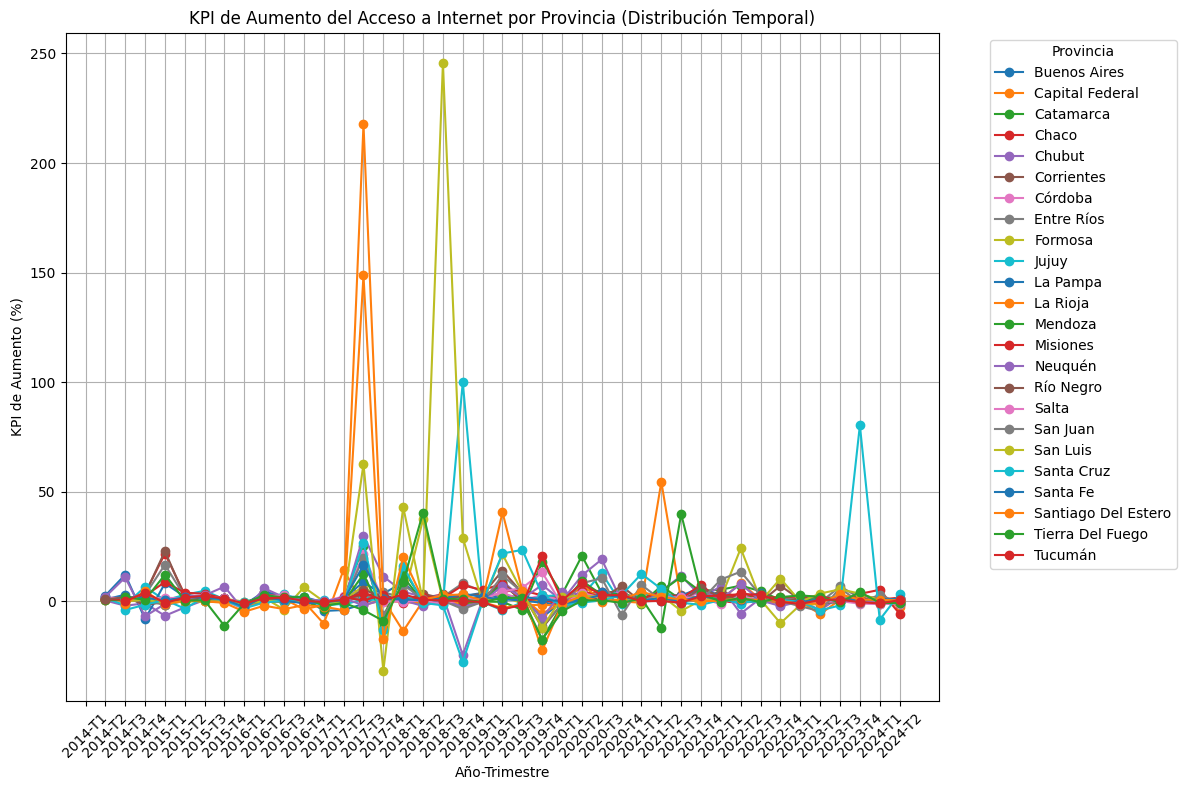

In [8]:
# Crear una nueva columna 'Año-Trimestre' para combinar Año y Trimestre
df_hogares['Año_Trimestre'] = df_hogares['Año'].astype(str) + '-T' + df_hogares['Trimestre'].astype(str)

# Graficar el KPI para cada provincia
plt.figure(figsize=(12, 8))
for provincia in df_hogares['Provincia'].unique():
    # Filtramos los datos de la provincia y los ordenamos por Año y Trimestre
    df_provincia = df_hogares[df_hogares['Provincia'] == provincia].sort_values(by=['Año', 'Trimestre'])
    
    # Graficamos el KPI de esa provincia
    plt.plot(df_provincia['Año_Trimestre'], df_provincia['KPI_Aumento_Acceso'], label=provincia, marker='o')

plt.title('KPI de Aumento del Acceso a Internet por Provincia (Distribución Temporal)')
plt.xlabel('Año-Trimestre')
plt.ylabel('KPI de Aumento (%)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visibilidad
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


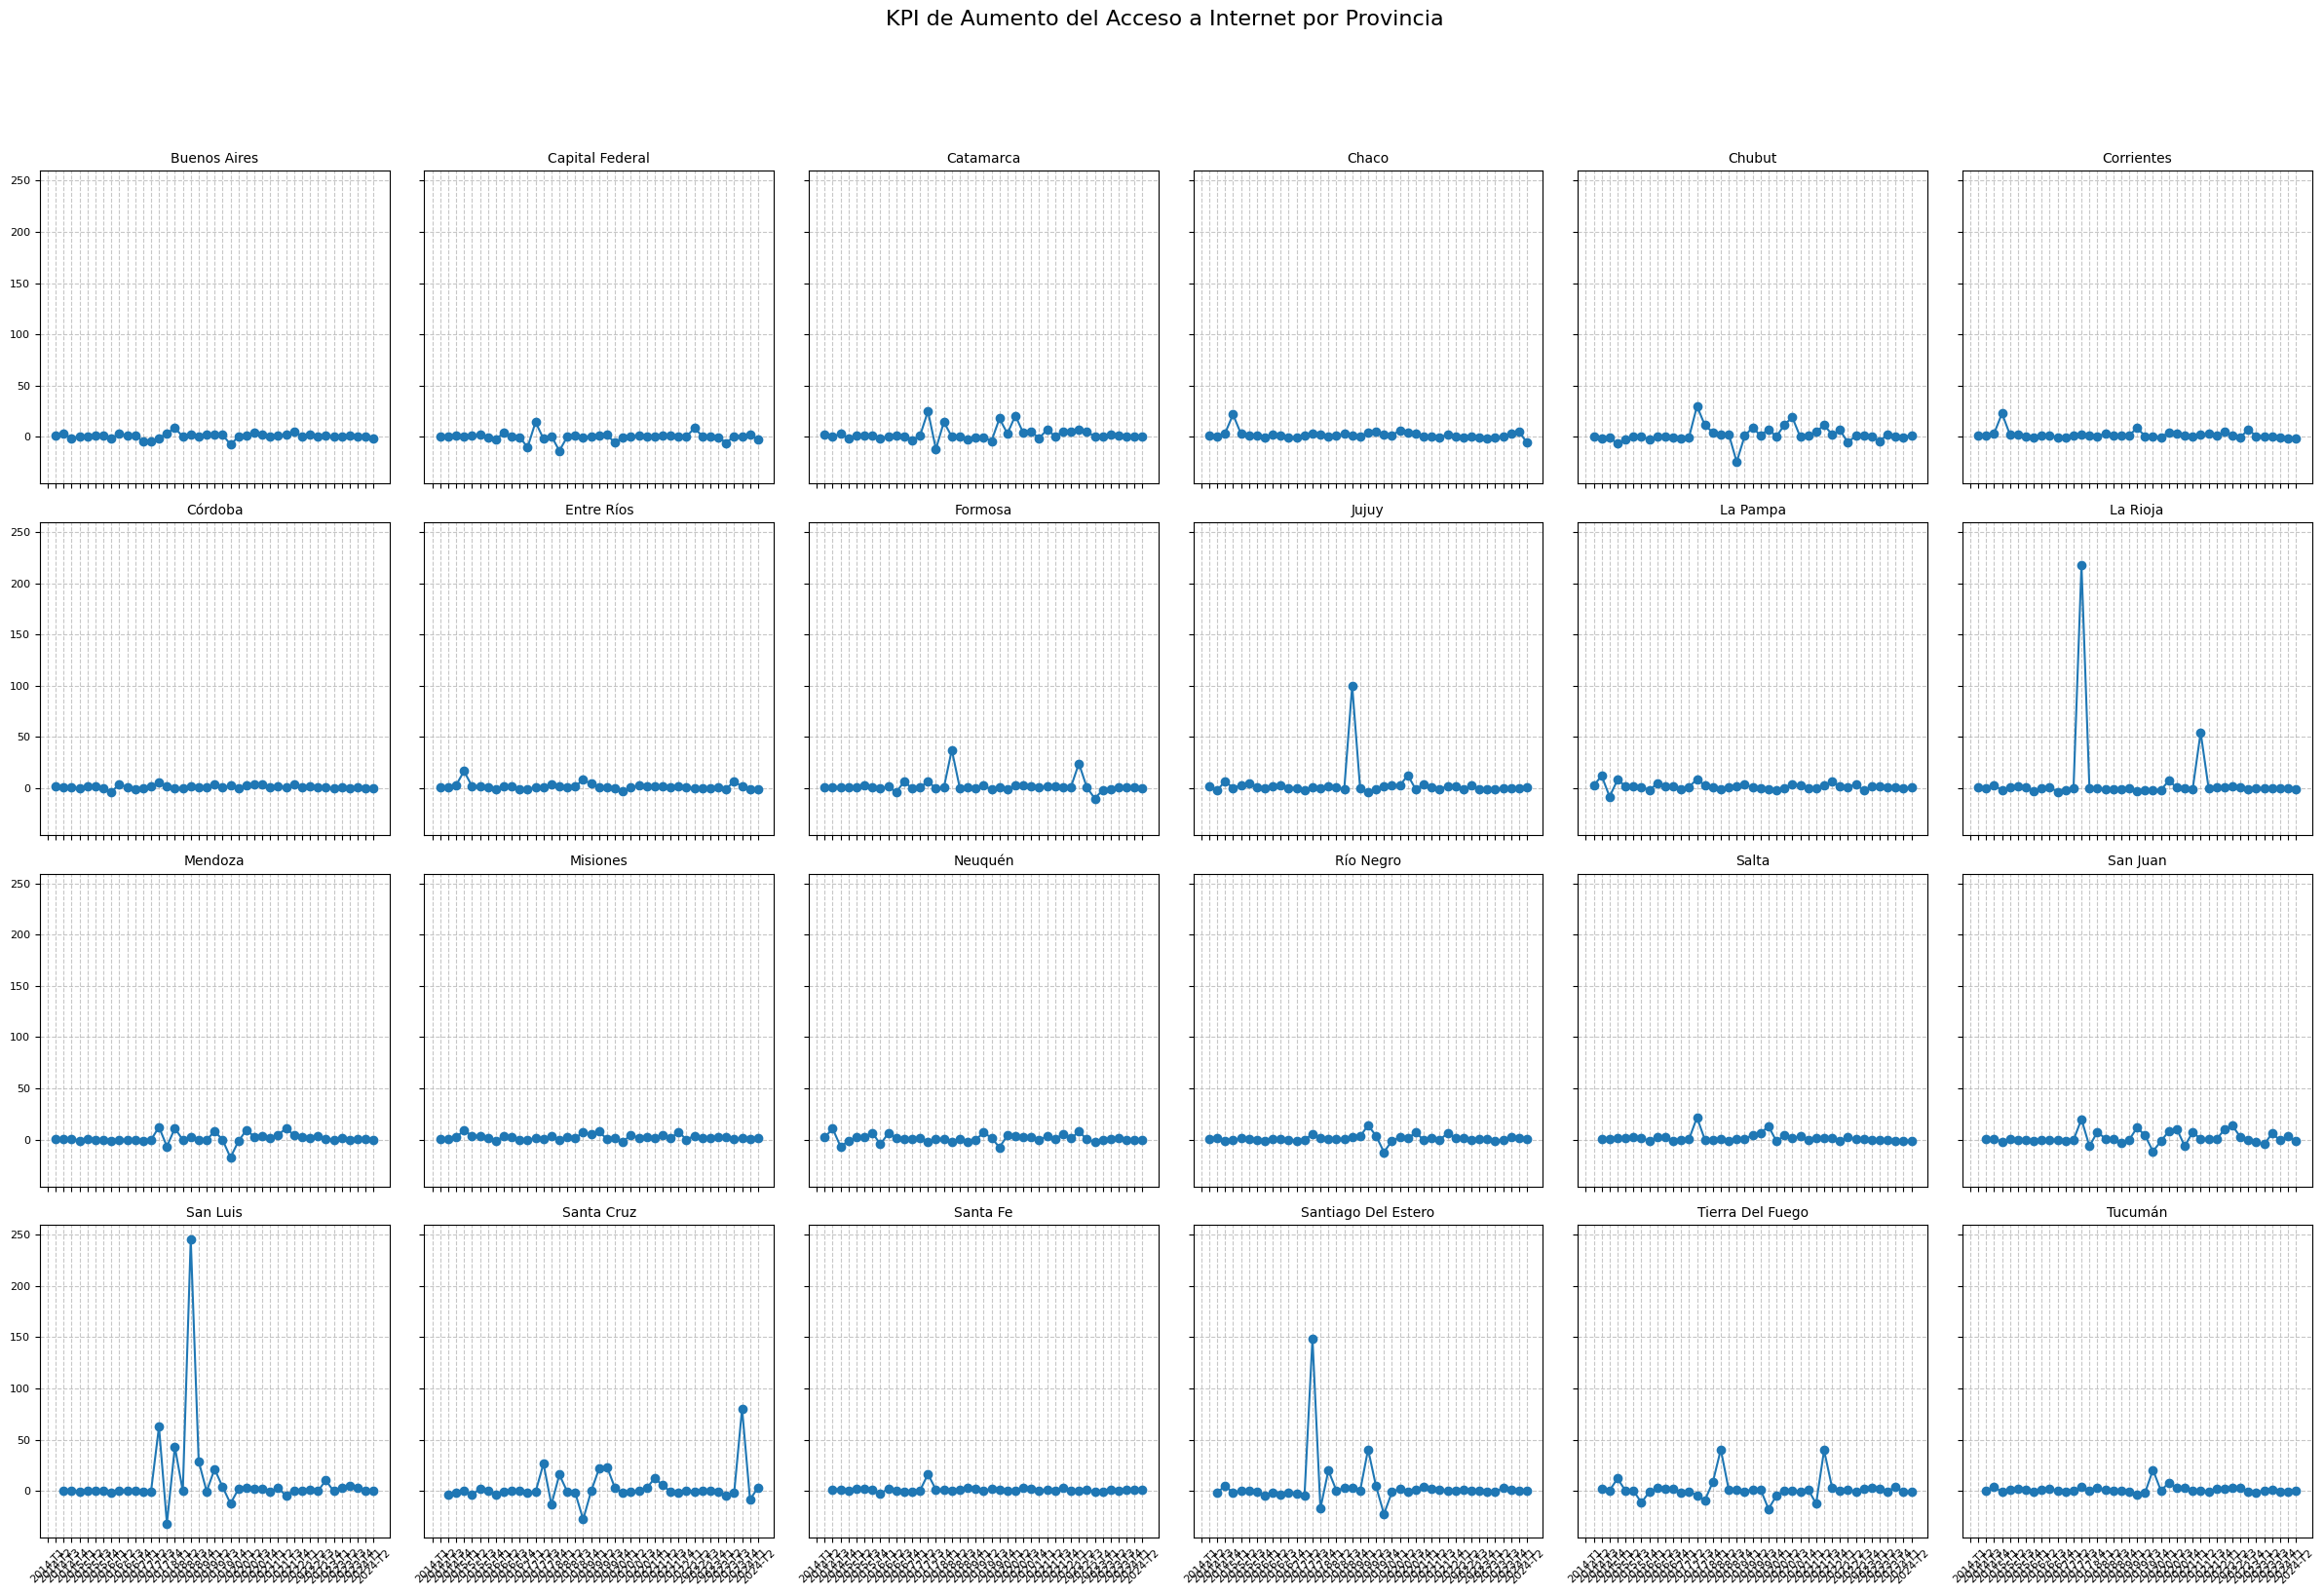

In [9]:
# Crear una nueva columna 'Año-Trimestre' para combinar Año y Trimestre
df_hogares['Año_Trimestre'] = df_hogares['Año'].astype(str) + '-T' + df_hogares['Trimestre'].astype(str)

# Obtener la lista de provincias
provincias = df_hogares['Provincia'].unique()

# Configurar el tamaño de la figura y la distribución de subgráficos (4 filas x 6 columnas)
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 16), sharex=True, sharey=True)
axes = axes.flatten()

# Graficar cada provincia en su propio subgráfico
for i, provincia in enumerate(provincias):
    df_provincia = df_hogares[df_hogares['Provincia'] == provincia].sort_values(by=['Año', 'Trimestre'])
    axes[i].plot(df_provincia['Año_Trimestre'], df_provincia['KPI_Aumento_Acceso'], marker='o', color='tab:blue')
    axes[i].set_title(provincia, fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=8)  # Rotar etiquetas del eje X para mayor claridad
    axes[i].tick_params(axis='y', labelsize=8)  # Ajustar tamaño de etiquetas del eje Y

# Ocultar cualquier subgráfico sobrante si hay menos provincias que subgráficos
for j in range(len(provincias), len(axes)):
    axes[j].axis('off')

# Ajustar el título general y diseño del layout
plt.suptitle('KPI de Aumento del Acceso a Internet por Provincia', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que no se superpongan títulos
plt.show()


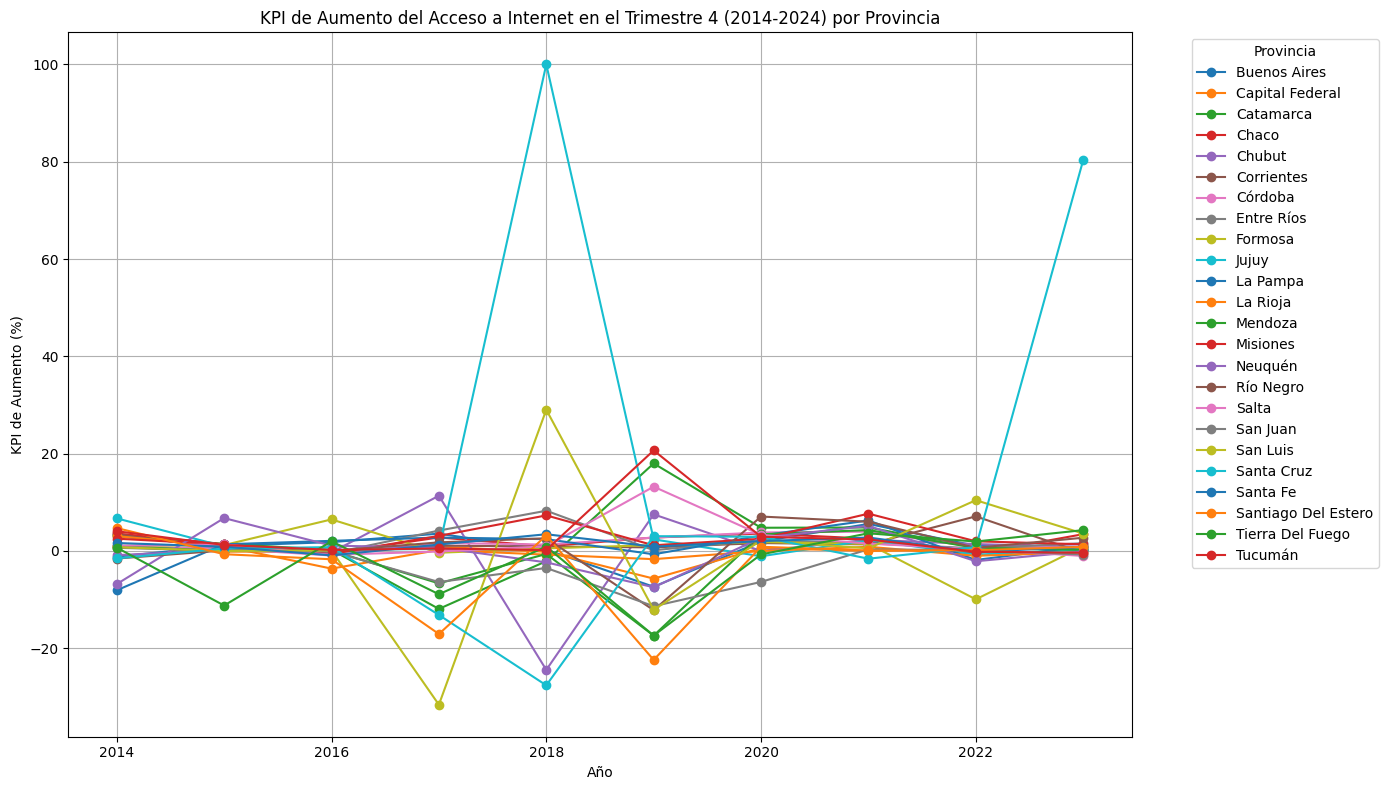

In [10]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo el trimestre 4 desde 2014 hasta 2024
df_hogares_trim4 = df_hogares[(df_hogares['Trimestre'] == 4) & (df_hogares['Año'].between(2014, 2024))]

# Crear un gráfico para cada provincia en el trimestre 4 desde 2014 hasta 2024
plt.figure(figsize=(14, 8))
for provincia in df_hogares_trim4['Provincia'].unique():
    # Filtramos los datos de la provincia
    df_provincia_trim4 = df_hogares_trim4[df_hogares_trim4['Provincia'] == provincia]
    
    # Graficamos el KPI de esa provincia
    plt.plot(df_provincia_trim4['Año'], df_provincia_trim4['KPI_Aumento_Acceso'], label=provincia, marker='o')

plt.title('KPI de Aumento del Acceso a Internet en el Trimestre 4 (2014-2024) por Provincia')
plt.xlabel('Año')
plt.ylabel('KPI de Aumento (%)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


---

**Análisis del KPI de Aumento del Acceso a Internet por Provincia: Desempeños, Desafíos y Recomendaciones**

Durante el análisis del KPI de aumento del acceso a internet, se observaron distintas tendencias en las provincias argentinas. Se destaca que provincias como **Buenos Aires, Capital Federal, Santa Cruz, y La Rioja** mostraron incrementos significativos, superando consistentemente el umbral del 2% esperado en varios trimestres. Por otro lado, provincias como **Salta, Tucumán, Chubut, y Jujuy** presentaron un desempeño más errático, con periodos en los que el KPI estuvo cerca de cero o incluso negativo.

Es importante destacar que el comportamiento fluctuante de algunas regiones puede deberse a factores como la infraestructura de telecomunicaciones, el alcance de las políticas públicas, y la disponibilidad de inversiones. Las provincias con valores negativos cercanos a cero enfrentan desafíos en la mejora de su cobertura de internet y requieren un enfoque personalizado para revertir esta tendencia.

**Recomendaciones**:
1. **Inversión en infraestructura**: Ampliar y mejorar la red de telecomunicaciones, especialmente en las provincias con desempeño negativo.
2. **Programas de incentivo**: Desarrollar políticas para fomentar la adopción de internet en hogares, promoviendo tarifas accesibles y subsidios en áreas críticas.
3. **Monitoreo y ajuste continuo**: Implementar un sistema de seguimiento trimestral del KPI para evaluar la efectividad de las estrategias aplicadas y ajustar según sea necesario.

Este análisis permite entender dónde concentrar esfuerzos para garantizar un crecimiento más uniforme y sostenible en el acceso a internet en todo el país.

#### **Guardar el DataFrame**
Cree un nuevo data para usarlo después, lo llamé  "df_hogares".

In [11]:
# Guardar el DataFrame con el KPI calculado en la ruta especificada
df_hogares.to_csv(r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsKpis\KPI_Aumento_Acceso_Hogares.csv', index=False)

---

#### **Cálculo del KPI de Crecimiento de Accesos a Internet por Tecnología**
Este análisis busca medir  el crecimiento trimestral de accesos por tecnología con una meta del 5%.  
- **Organización de datos**: Ordenaron por provincia, tecnología, año y trimestre para un análisis secuencial.  
- **Cálculo del KPI**: **KPI_Crecimiento = ((Acceso_Tecnología_Actual - Acceso_Tecnología_Anterior) / Acceso_Tecnología_Anterior) * 100**  
- **Resultados**: Se añaden las columnas KPI_Crecimiento y Cumple_Meta_5% para indicar el cumplimiento de la meta.

#### Ruta del archivo CSV Limpio

In [12]:
# Accesos Por Tecnología:
ruta2 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Accesos Por Tecnología.csv'

#### **DataFrame original ordenado**

In [13]:
# Cargar el archivo CSV en df_accesos
df_accesos = pd.read_csv(ruta2)

# Ordenar el DataFrame por 'Provincia', 'Año', y 'Trimestre'
df_accesos.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, True, True], inplace=True)

# Mostrar el DataFrame original, ordenado pero sin modificaciones
print("DataFrame Original Ordenado:\n")
print(df_accesos[['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].head(10))



DataFrame Original Ordenado:

        Provincia   Año  Trimestre       ADSL  Cablemodem  Fibra óptica  \
983  Buenos Aires  2014          1  1567685.0   1000879.0      120960.0   
959  Buenos Aires  2014          2  1568881.0   1025490.0      120008.0   
935  Buenos Aires  2014          3  1562533.0   1110628.0      124474.0   
911  Buenos Aires  2014          4  1575978.0   1070135.0      120528.0   
887  Buenos Aires  2015          1  1583135.0   1096836.0      134177.0   
863  Buenos Aires  2015          2  1581770.0   1141052.0      115660.0   
839  Buenos Aires  2015          3  1585467.0   1183894.0      113590.0   
815  Buenos Aires  2015          4  1586343.0   1223603.0      103269.0   
791  Buenos Aires  2016          1  1583560.0   1200859.0      111231.0   
767  Buenos Aires  2016          2  1579448.0   1305949.0      113070.0   

     Wireless    Otros  
983   16528.0  33824.0  
959   17020.0  33147.0  
935   20049.0  31881.0  
911   17728.0  32038.0  
887   18754.0  2894

#### **Cálculo del KPI y Creación de Columnas Adicionales en el DataFrame**

In [14]:
# Ordenar los datos por provincia, año y trimestre
df_accesos = df_accesos.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Definir una función para calcular el KPI de Crecimiento
def calcular_kpi_crecimiento(df_accesos, tecnologia):
    # Calcular la variación entre trimestres consecutivos para cada provincia y tecnología
    df_accesos[f'KPI_Crecimiento_{tecnologia}'] = (
        (df_accesos[tecnologia] - df_accesos.groupby('Provincia')[tecnologia].shift(1)) /
        df_accesos.groupby('Provincia')[tecnologia].shift(1)
    ) * 100
    # Evaluar si el KPI cumple el 5% esperado
    df_accesos[f'Cumple_Meta_5%_{tecnologia}'] = df_accesos[f'KPI_Crecimiento_{tecnologia}'] >= 5
    return df_accesos

# Aplicar la función para cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for tecnologia in tecnologias:
    df_accesos = calcular_kpi_crecimiento(df_accesos, tecnologia)

# Ver el resultado final
print(df_accesos.head(10))

      Año  Trimestre     Provincia       ADSL  Cablemodem  Fibra óptica  \
983  2014          1  Buenos Aires  1567685.0   1000879.0      120960.0   
959  2014          2  Buenos Aires  1568881.0   1025490.0      120008.0   
935  2014          3  Buenos Aires  1562533.0   1110628.0      124474.0   
911  2014          4  Buenos Aires  1575978.0   1070135.0      120528.0   
887  2015          1  Buenos Aires  1583135.0   1096836.0      134177.0   
863  2015          2  Buenos Aires  1581770.0   1141052.0      115660.0   
839  2015          3  Buenos Aires  1585467.0   1183894.0      113590.0   
815  2015          4  Buenos Aires  1586343.0   1223603.0      103269.0   
791  2016          1  Buenos Aires  1583560.0   1200859.0      111231.0   
767  2016          2  Buenos Aires  1579448.0   1305949.0      113070.0   

     Wireless    Otros      Total  Suma_Tecnologías  KPI_Crecimiento_ADSL  \
983   16528.0  33824.0  2739876.0         2739876.0                   NaN   
959   17020.0  33147

#### Resumen del DataFrame:  
Comentario: El DataFrame contiene información trimestral desglosada por provincia sobre el acceso a tecnologías de internet (ADSL, Cablemodem, Fibra óptica, Wireless y Otros) desde 2014. Las columnas calculadas incluyen totales y porcentajes de crecimiento de accesos por tecnología, como **KPI_Crecimiento_ADSL** y **KPI_Crecimiento_Cablemodem**, y columnas de verificación de cumplimiento de la meta del 5% (**Cumple_Meta_5%_[tecnología]**), que indican si el crecimiento trimestral alcanzó o superó ese umbral.

In [15]:
# Verificar las columnas disponibles en el DataFrame
print(df_accesos.columns)


Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total', 'Suma_Tecnologías',
       'KPI_Crecimiento_ADSL', 'Cumple_Meta_5%_ADSL',
       'KPI_Crecimiento_Cablemodem', 'Cumple_Meta_5%_Cablemodem',
       'KPI_Crecimiento_Fibra óptica', 'Cumple_Meta_5%_Fibra óptica',
       'KPI_Crecimiento_Wireless', 'Cumple_Meta_5%_Wireless',
       'KPI_Crecimiento_Otros', 'Cumple_Meta_5%_Otros'],
      dtype='object')


#### **Mapa de Calor de la Correlación entre KPIs de Crecimiento**

Matriz de correlación entre KPIs de crecimiento:
                              KPI_Crecimiento_ADSL  \
KPI_Crecimiento_ADSL                      1.000000   
KPI_Crecimiento_Cablemodem                0.067874   
KPI_Crecimiento_Fibra óptica             -0.125157   
KPI_Crecimiento_Wireless                  0.012677   
KPI_Crecimiento_Otros                     0.012421   

                              KPI_Crecimiento_Cablemodem  \
KPI_Crecimiento_ADSL                            0.067874   
KPI_Crecimiento_Cablemodem                      1.000000   
KPI_Crecimiento_Fibra óptica                    0.010677   
KPI_Crecimiento_Wireless                       -0.006064   
KPI_Crecimiento_Otros                           0.027157   

                              KPI_Crecimiento_Fibra óptica  \
KPI_Crecimiento_ADSL                             -0.125157   
KPI_Crecimiento_Cablemodem                        0.010677   
KPI_Crecimiento_Fibra óptica                      1.000000   
KPI_Crecimiento_W

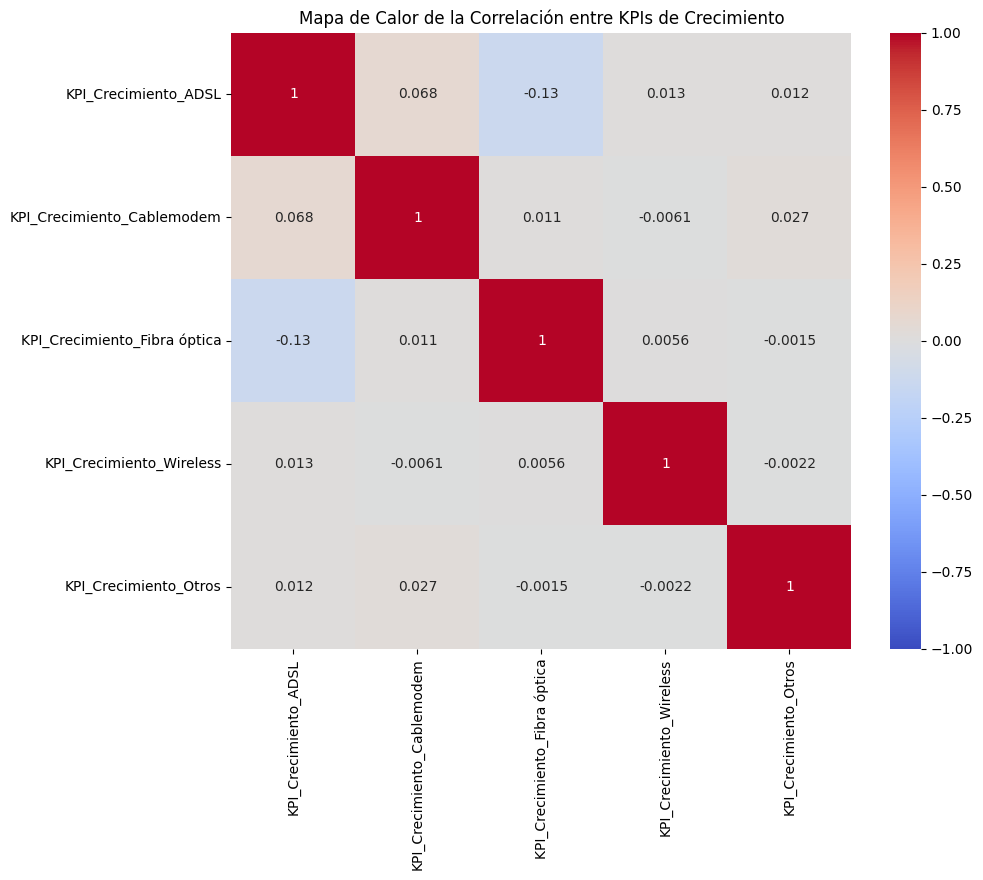

In [16]:
# Selección de columnas de KPI de crecimiento de cada tecnología
columnas_kpi = ['KPI_Crecimiento_ADSL', 'KPI_Crecimiento_Cablemodem', 'KPI_Crecimiento_Fibra óptica', 'KPI_Crecimiento_Wireless', 'KPI_Crecimiento_Otros']

# Eliminar filas con valores NaN en las columnas seleccionadas
df_accesos_clean = df_accesos.dropna(subset=columnas_kpi)

# Calcular la matriz de correlación
matriz_correlacion = df_accesos_clean[columnas_kpi].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre KPIs de crecimiento:")
print(matriz_correlacion)

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Correlación entre KPIs de Crecimiento')
plt.show()



#### **Resumen del Análisis de Tendencias por Tecnología:**  
Estos resultados sugieren que el crecimiento de cada tecnología sigue un patrón independiente. La expansión de nuevas tecnologías como la fibra óptica podría estar afectando levemente a tecnologías más antiguas como ADSL, mientras que las demás muestran un comportamiento aislado.

Recomendación: Es conveniente priorizar estrategias que fomenten la adopción de tecnologías de alta demanda y crecimiento (como la fibra óptica) sin depender del comportamiento de otras. También, sería útil profundizar en los factores que impulsan el crecimiento de cada tecnología a nivel regional.

#### **Porcentaje de trimestres que cumplen con la meta del 5% de crecimiento por tecnología**

In [17]:
# Cargar el archivo CSV (reemplaza 'ruta_al_archivo.csv' por la ruta de tu archivo)
df_accesos = pd.read_csv(ruta2)

# Verificar que las columnas de acceso están en el DataFrame
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for tecnologia in tecnologias:
    if tecnologia not in df_accesos.columns:
        raise KeyError(f"La columna '{tecnologia}' no existe en el DataFrame.")

# Calcular el KPI de crecimiento trimestral para cada tecnología
for tecnologia in tecnologias:
    df_accesos[f'KPI_Crecimiento_{tecnologia}'] = df_accesos[tecnologia].pct_change() * 100

# Crear columnas para verificar si el crecimiento supera el 5% para cada tecnología
for tecnologia in tecnologias:
    columna_crecimiento = f'KPI_Crecimiento_{tecnologia}'
    columna_cumple_meta = f'Cumple_Meta_5%_{tecnologia}'
    df_accesos[columna_cumple_meta] = df_accesos[columna_crecimiento] >= 5

# Calcular el porcentaje de trimestres que cumplen la meta del 5% para cada tecnología
cumplimiento_tecnologias = {}
for tecnologia in tecnologias:
    columna_cumple_meta = f'Cumple_Meta_5%_{tecnologia}'
    total_trimestres = df_accesos[columna_cumple_meta].count()
    trimestres_cumplen = df_accesos[columna_cumple_meta].sum()
    porcentaje_cumplimiento = (trimestres_cumplen / total_trimestres) * 100
    cumplimiento_tecnologias[tecnologia] = porcentaje_cumplimiento

# Mostrar los resultados
print("Porcentaje de trimestres que cumplen con la meta del 5% de crecimiento por tecnología:")
for tecnologia, porcentaje in cumplimiento_tecnologias.items():
    print(f"{tecnologia}: {porcentaje:.2f}%")


Porcentaje de trimestres que cumplen con la meta del 5% de crecimiento por tecnología:
ADSL: 49.55%
Cablemodem: 48.76%
Fibra óptica: 47.37%
Wireless: 47.57%
Otros: 47.27%


**Observación clave**: Un porcentaje de cumplimiento superior al 60-70% indicaría un crecimiento saludable y sostenido. Aunque ADSL lidera con un 49.55%, es necesario mejorar estos resultados en todas las tecnologías. Un rango entre 50-60% podría considerarse aceptable, pero porcentajes menores sugieren la necesidad de estrategias de impulso.

#### **Evolución de los Accesos por Tecnología**

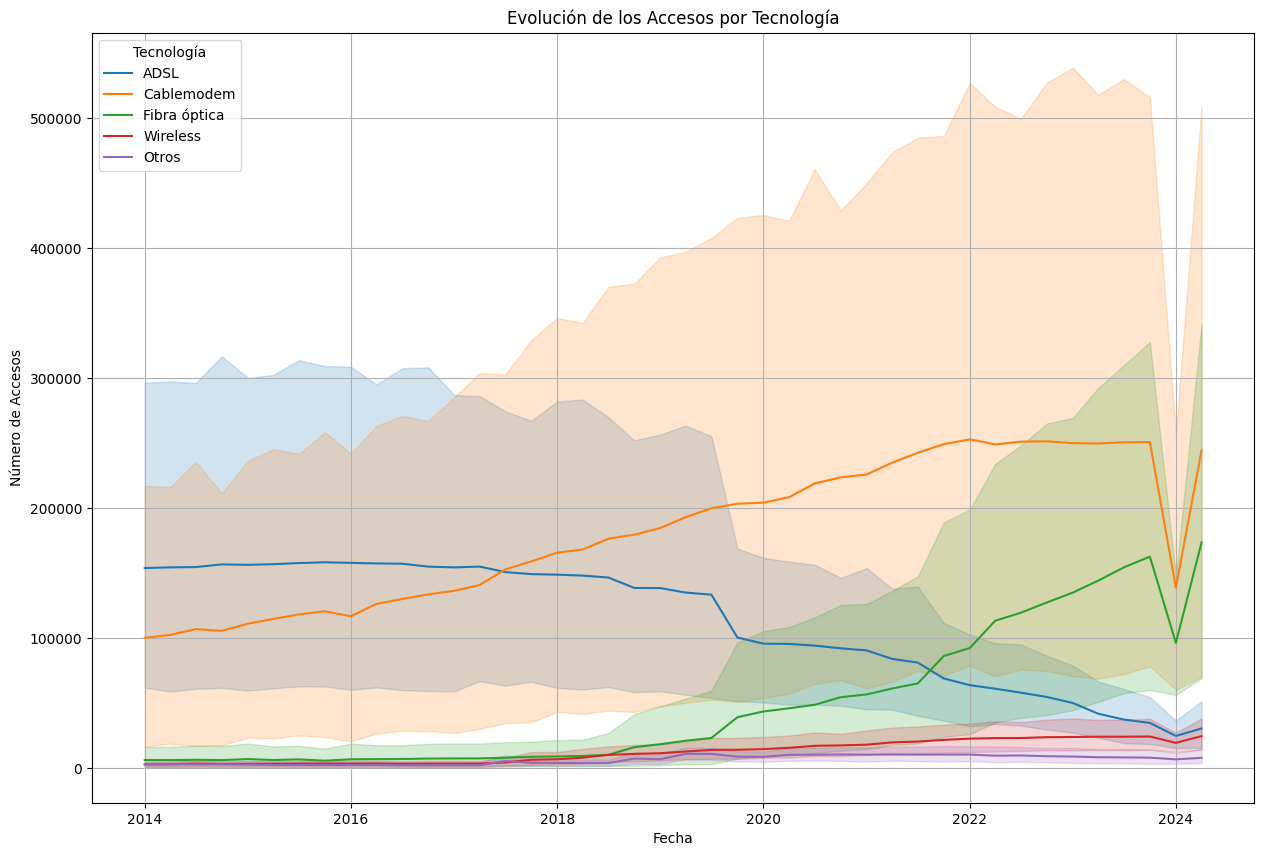

In [18]:
# Cargar el archivo CSV en df_accesos
df_accesos = pd.read_csv(ruta2)

# Ordenar el DataFrame por 'Provincia', 'Año', y 'Trimestre'
df_accesos.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, True, True], inplace=True)

# Crear un gráfico de líneas para cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.figure(figsize=(15, 10))

for tecnologia in tecnologias:
    sns.lineplot(
        x=pd.to_datetime(df_accesos['Año'].astype(str) + 'Q' + df_accesos['Trimestre'].astype(str)),
        y=df_accesos[tecnologia],
        label=tecnologia
    )

plt.title('Evolución de los Accesos por Tecnología')
plt.xlabel('Fecha')
plt.ylabel('Número de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()


**Conclusión**: El gráfico sugiere un cambio en la preferencia hacia tecnologías más avanzadas y eficientes como Cablemodem y Fibra óptica, mientras que las tecnologías más antiguas, como ADSL, están perdiendo relevancia.

In [19]:
for tecnologia in tecnologias:
    df_accesos[f'KPI_Crecimiento_{tecnologia}'] = df_accesos[tecnologia].pct_change() * 100


#### **Calcular qué trimestres superan el umbral de crecimiento del 5% para cada tecnología**

In [20]:
# Calcular qué trimestres superan el umbral de crecimiento del 5% para cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
umbral_crecimiento = 5

for tecnologia in tecnologias:
    columna_crecimiento = f'KPI_Crecimiento_{tecnologia}'
    df_accesos[f'Cumple_Meta_{umbral_crecimiento}%_{tecnologia}'] = df_accesos[columna_crecimiento] >= umbral_crecimiento

# Calcular el porcentaje de trimestres que cumplen la meta
porcentaje_cumplimiento = {}
for tecnologia in tecnologias:
    columna_cumple_meta = f'Cumple_Meta_{umbral_crecimiento}%_{tecnologia}'
    porcentaje_cumplimiento[tecnologia] = df_accesos[columna_cumple_meta].mean() * 100

# Mostrar resultados
for tecnologia, porcentaje in porcentaje_cumplimiento.items():
    print(f"{tecnologia}: {porcentaje:.2f}% de los trimestres superan el 5% de crecimiento.")


ADSL: 4.07% de los trimestres superan el 5% de crecimiento.
Cablemodem: 21.65% de los trimestres superan el 5% de crecimiento.
Fibra óptica: 41.61% de los trimestres superan el 5% de crecimiento.
Wireless: 25.32% de los trimestres superan el 5% de crecimiento.
Otros: 15.59% de los trimestres superan el 5% de crecimiento.


**Conclusión:**
La fibra óptica muestra el mayor porcentaje de trimestres con un crecimiento superior al 5%, indicando su fuerte adopción. Sin embargo, ADSL destaca por su baja superación de la meta (4.07%), lo que confirma su tendencia de estancamiento o declive. Cablemodem y Wireless tienen un crecimiento moderado, mientras que "Otros" presentan el menor rendimiento después de ADSL.

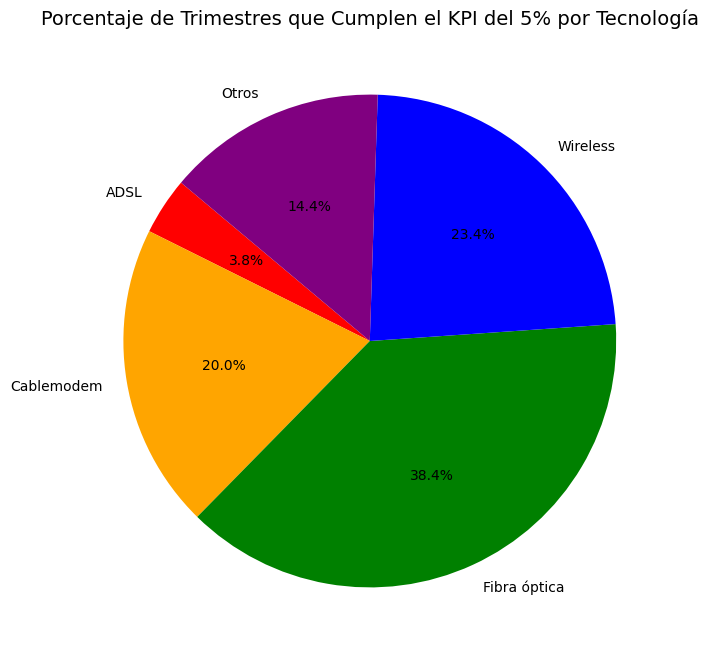

In [21]:
# Porcentajes de trimestres que cumplen el KPI por tecnología
kpi_cumplimiento = {
    'ADSL': 4.07,
    'Cablemodem': 21.65,
    'Fibra óptica': 41.61,
    'Wireless': 25.32,
    'Otros': 15.59
}

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(kpi_cumplimiento.values(), labels=kpi_cumplimiento.keys(), autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'green', 'blue', 'purple'])

# Personalización del gráfico
plt.title('Porcentaje de Trimestres que Cumplen el KPI del 5% por Tecnología', fontsize=14)

plt.show()

#### **Análisis General**  
**Cumplimiento del KPI**:  
- **Fibra Óptica (38.4%)**: Es la tecnología que más consistentemente cumple con la meta del 5%, lo que refleja su papel líder en el crecimiento del acceso a internet. Esto sugiere que es una tecnología en expansión con alta adopción.
- **Wireless (23.4%)**: Muestra un cumplimiento moderado, lo que indica que es una opción viable en regiones donde la infraestructura de fibra aún no es factible.
- **Cablemodem (20.0%)**: Tiene un desempeño aceptable, reflejando una estabilidad en áreas urbanas y suburbanas.
- **Otros (14.4%)**: Este grupo tiene un menor cumplimiento, lo que sugiere que se compone de tecnologías con menor adopción o en declive.
- **ADSL (3.8%)**: El porcentaje más bajo, lo que confirma que está siendo reemplazada por tecnologías más avanzadas y ha perdido relevancia en el mercado.

### Conclusión:
El gráfico destaca la **fibra óptica** como la tecnología más prometedora y con mayor tasa de crecimiento, mientras que **ADSL** y **Otros** tienen un desempeño muy bajo. Este análisis apoya la recomendación de priorizar inversiones en **fibra óptica** y considerar **wireless** y **cablemodem** como alternativas estratégicas en ciertas regiones.

#### **Recomendaciones:**  
- **Inversión en Fibra Óptica**: Priorizar su expansión, ya que lidera el cumplimiento del KPI (38.4%).
- **Complemento con Wireless y Cablemodem**: Usar estas tecnologías en áreas donde la fibra no sea viable.
- **Reducir ADSL**: Minimizar inversiones en ADSL (3.8% de cumplimiento) y migrar clientes a opciones modernas.
- **Segmentación Regional**: Personalizar estrategias de inversión por provincia según el potencial de crecimiento.
- **Monitoreo de KPIs**: Evaluar trimestralmente y ajustar estrategias de forma ágil.
- **Paquetes Atractivos**: Ofrecer combos con fibra óptica y servicios extra para atraer clientes.  


Estas medidas buscan optimizar la inversión y garantizar un crecimiento sostenible.

#### **Guardar el DataFrame**

Cree un nuevo data para usarlo después, lo llamé  "df_accesos".

In [22]:
# Guardar el DataFrame con el KPI calculado en la ruta especificada
df_accesos.to_csv(r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsKpis\Totales_Accesos_Por_Tecnología_crecimiento.csv', index=False)

---

### **Cálculo del KPI de Penetración del Servicio de Internet por Población**

Este KPI mide el porcentaje de la población con acceso a Internet en cada provincia, proporcionando una visión del alcance y cobertura del servicio.

**Organización de Datos**: Cada registro debe contener las columnas provincia, año, trimestre, población y total de accesos a Internet.  
**Proyección de acceso**: Lograr un 3% de incremento,en comparación con el período anterior.  
**Cálculo del KPI**:    **KPI = (Total de Accesos a Internet / Población total) * 100.**

**Resultado Final**: Se crea una nueva columna que contiene el **KPI de Penetracion** para cada provincia, lo que nos permite visualizar cómo cada provincia evoluciona en términos de accesos a lo largo del tiempo, provincia por provincia.

#### **Nuevo archivo: "Accesos_poblacion.csv"**  
Combiné los datasets **'Penetración-poblacion'** y **'Totales Accesos Por Tecnología'** usando Año y Trimestre como claves comunes, ya que Provincia no estaba presente en ambos. Guardé el DataFrame unificado como **'Accesos_poblacion.csv'** para análisis posteriores.

In [23]:
# Rutas de los archivos
ruta3 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Penetración-poblacion.csv'
ruta4 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Totales Accesos Por Tecnología.csv'

# Cargar los archivos CSV en DataFrames
df_poblacion = pd.read_csv(ruta3)  
df_TotalesAccesos = pd.read_csv(ruta4)  

# Asegurarse de que las columnas 'Año' tengan el mismo tipo
df_poblacion['Año'] = df_poblacion['Año'].astype(str)
df_TotalesAccesos['Año'] = df_TotalesAccesos['Año'].astype(str)

# Validar columnas necesarias
columnas_poblacion = ['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab']
columnas_accesos = ['Año', 'Trimestre', 'Total']

if not all(col in df_poblacion.columns for col in columnas_poblacion):
    raise ValueError("Faltan columnas en df_poblacion. Verifica que estén: 'Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'.")

if not all(col in df_TotalesAccesos.columns for col in columnas_accesos):
    raise ValueError("Faltan columnas en df_TotalesAccesos. Verifica que estén: 'Año', 'Trimestre', 'Total'.")

# Ordenar los DataFrames
df_poblacion.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, True, True], inplace=True)
df_TotalesAccesos.sort_values(by=['Año', 'Trimestre'], ascending=[True, True], inplace=True)

# Seleccionar las columnas relevantes
df_poblacion = df_poblacion[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab']]
df_TotalesAccesos = df_TotalesAccesos[['Año', 'Trimestre', 'Total']]

# Unir las tablas por Año y Trimestre (sin Provincia en df_TotalesAccesos)
accesos_poblacion_df = pd.merge(df_TotalesAccesos, df_poblacion, on=['Año', 'Trimestre'], how='inner')

# Guardar el DataFrame combinado como 'Accesos_poblacion.csv' en la ruta especificada
ruta_guardado = 'C:/Users/NOTEBOOK/Desktop/Proyecto_ConectandoArgentina/Datasets/DatasetsLimpios/Accesos_poblacion.csv'
accesos_poblacion_df.to_csv(ruta_guardado, index=False)

# Mostrar el archivo combinado
print(accesos_poblacion_df.head())

    Año  Trimestre    Total        Provincia  Accesos por cada 100 hab
0  2014          1  6398398     Buenos Aires                 16.692346
1  2014          1  6398398  Capital Federal                 42.655072
2  2014          1  6398398        Catamarca                  6.184615
3  2014          1  6398398            Chaco                  5.553671
4  2014          1  6398398           Chubut                 12.703590


#### **Evaluación del KPI y Cumplimiento del Incremento Proyectado**  
En este paso, calculé el KPI de penetración del servicio y añadí una columna para identificar si se cumple con el objetivo de incrementar en un 3% el KPI respecto al trimestre anterior. Esto me permite evaluar el desempeño en cada provincia y periodo.

In [24]:
# Verificar que las columnas necesarias estén presentes
if 'Total' in accesos_poblacion_df.columns and 'Accesos por cada 100 hab' in accesos_poblacion_df.columns:
    # Calcular la población
    accesos_poblacion_df['Población'] = accesos_poblacion_df['Total'] / (accesos_poblacion_df['Accesos por cada 100 hab'] / 100)
    
    # Calcular el KPI
    accesos_poblacion_df['KPI Penetración'] = (accesos_poblacion_df['Total'] / accesos_poblacion_df['Población']) * 100
    
    # Ordenar los datos para calcular el incremento
    accesos_poblacion_df.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)
    
    # Calcular el incremento porcentual respecto al trimestre anterior
    accesos_poblacion_df['Incremento (%)'] = accesos_poblacion_df.groupby('Provincia')['KPI Penetración'].pct_change() * 100
    
    # Evaluar si se cumple con el 3% de incremento proyectado
    accesos_poblacion_df['Cumple Incremento'] = accesos_poblacion_df['Incremento (%)'] >= 3
    
    # Mostrar las columnas relevantes
    print(accesos_poblacion_df[['Provincia', 'Año', 'Trimestre', 'Total', 'Población', 'KPI Penetración', 'Incremento (%)', 'Cumple Incremento']].head())
else:
    print("Las columnas necesarias no están disponibles en el DataFrame.")



       Provincia   Año  Trimestre    Total     Población  KPI Penetración  \
0   Buenos Aires  2014          1  6398398  3.833133e+07        16.692346   
16  Buenos Aires  2014          2  6464468  3.849060e+07        16.794925   
40  Buenos Aires  2014          3  6595271  3.820467e+07        17.262998   
64  Buenos Aires  2014          4  6598496  3.878100e+07        17.014763   
88  Buenos Aires  2015          1  6737732  3.907881e+07        17.241393   

    Incremento (%)  Cumple Incremento  
0              NaN              False  
16        0.614530              False  
40        2.786991              False  
64       -1.437960              False  
88        1.331961              False  


La tabla detalla el **KPI de penetración del servicio de Internet** por provincia y trimestre, cuantificando el porcentaje de accesos sobre la población total. Incluye el incremento trimestral y una validación booleana sobre el cumplimiento de la meta del 3%. Esta información facilita un análisis técnico sobre la evolución del servicio y el cumplimiento de objetivos estratégicos.

#### ** gráfico de barras para visualizar el KPI de penetración por provincia**

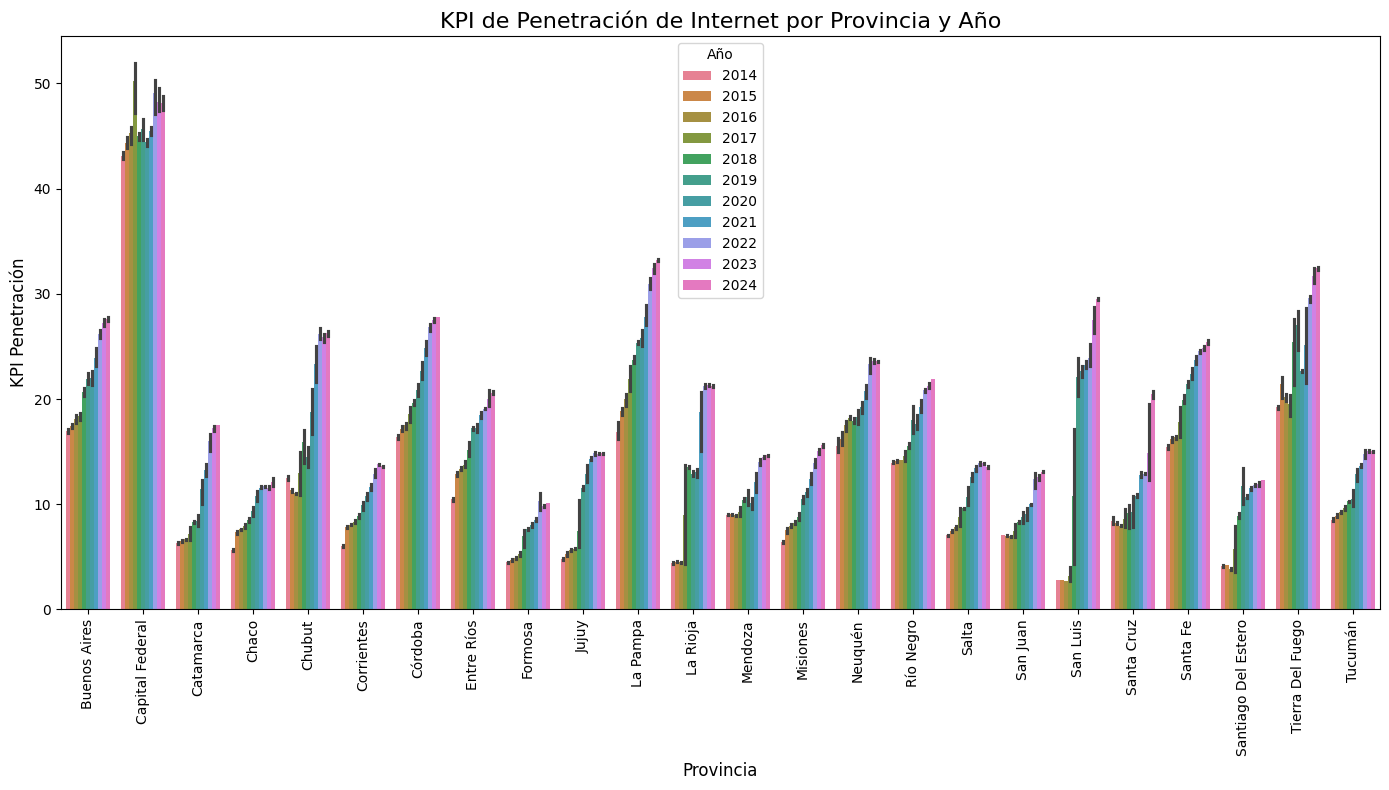

In [25]:
# Crear un gráfico de barras para visualizar el KPI de penetración por provincia
plt.figure(figsize=(14, 8))
sns.barplot(data=accesos_poblacion_df, x='Provincia', y='KPI Penetración', hue='Año')

# Configurar título y etiquetas
plt.title('KPI de Penetración de Internet por Provincia y Año', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('KPI Penetración', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Análisis del gráfico**: El gráfico de penetración de internet por provincia y año muestra un crecimiento generalizado de 2014 a 2024, destacando a Buenos Aires y Capital Federal con los valores más altos, lo que indica mejor infraestructura. Provincias como Catamarca, Chaco y Formosa tienen valores más bajos, sugiriendo desafíos en conectividad. A pesar de un crecimiento continuo en la mayoría, algunos años muestran aumentos notables, posiblemente por políticas de inversión o la pandemia. En general, se observa una disparidad regional que sugiere la necesidad de focalizar inversiones en áreas con menor desarrollo para reducir la brecha digital.

#### **Evolución de la Penetración de Internet por Trimestre**

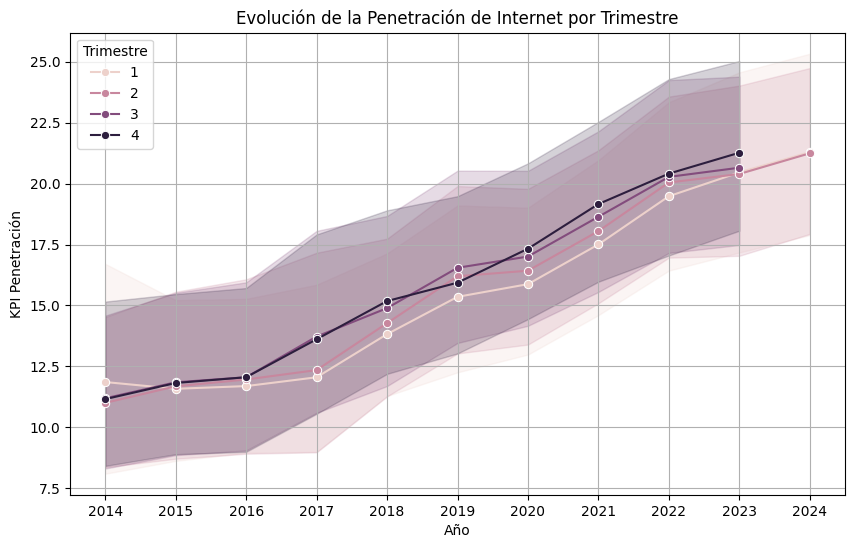

In [26]:
# Verificar que las columnas necesarias estén presentes
if 'Total' in accesos_poblacion_df.columns and 'Accesos por cada 100 hab' in accesos_poblacion_df.columns:
    # Calcular la población
    accesos_poblacion_df['Población'] = accesos_poblacion_df['Total'] / (accesos_poblacion_df['Accesos por cada 100 hab'] / 100)
    
    # Calcular el KPI
    accesos_poblacion_df['KPI Penetración'] = (accesos_poblacion_df['Total'] / accesos_poblacion_df['Población']) * 100
    
    # Ordenar los datos para calcular el incremento
    accesos_poblacion_df.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)
    
    # Calcular el incremento porcentual respecto al trimestre anterior
    accesos_poblacion_df['Incremento (%)'] = accesos_poblacion_df.groupby('Provincia')['KPI Penetración'].pct_change() * 100
    
    # Reemplazar NaN en la columna 'Incremento (%)' por 0 solo para el gráfico
    accesos_poblacion_df['Incremento (%)'].fillna(0, inplace=True)
    
    # Evaluar si se cumple con el 3% de incremento proyectado
    accesos_poblacion_df['Cumple Incremento'] = accesos_poblacion_df['Incremento (%)'] >= 3
    
    # Gráfico de la evolución de la Penetración de Internet por Trimestre
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=accesos_poblacion_df, x='Año', y='KPI Penetración', hue='Trimestre', marker='o')
    plt.title('Evolución de la Penetración de Internet por Trimestre')
    plt.xlabel('Año')
    plt.ylabel('KPI Penetración')
    plt.legend(title='Trimestre')  # Esto es suficiente para manejar la leyenda automáticamente
    plt.grid(True)
    plt.show()
else:
    print("Las columnas necesarias no están disponibles en el DataFrame.")



Al observar el gráfico de la penetración de internet desde 2014 hasta 2024, noto un crecimiento constante a lo largo de los años, con una aceleración significativa a partir de 2018. El cuarto trimestre suele mostrar una penetración ligeramente más alta, lo que puede estar relacionado con incrementos en la demanda o mejoras en infraestructura hacia el final del año.

También veo que los intervalos de confianza son más amplios a medida que avanza el tiempo, especialmente después de 2020, lo que podría deberse a factores externos como la pandemia o cambios económicos. En los últimos años (2023-2024), aunque hay más dispersión, la tendencia sigue siendo ascendente.

En general, aunque la penetración de internet sigue mejorando, hay incertidumbre debido a factores externos. Esto me hace pensar que, al proyectar el futuro, debo considerar esas fluctuaciones y cómo eventos como crisis económicas o políticas regulatorias podrían afectar el crecimiento.

### **Análisis General**
El análisis del KPI de penetración de servicio de internet muestra una distribución desigual en Argentina. **Buenos Aires y Capital Federal** lideran en niveles de penetración, reflejando su sólida infraestructura y alto acceso. En contraste, **Catamarca, Chaco y Formosa** presentan niveles bajos, lo que revela una marcada brecha digital entre regiones. El cumplimiento del incremento del 3% varía: algunas provincias de alta penetración no logran sostener un crecimiento consistente, mientras que las regiones con menor desarrollo tienen un avance más lento.

### **Conclusiones**
1. **Desigualdad Regional**: Las brechas de conectividad evidencian una disparidad notable, con provincias rezagadas en desarrollo de infraestructura.
2. **Influencia de Factores Externos**: Eventos como la pandemia impulsaron la conectividad entre 2020-2022, pero los años posteriores muestran fluctuaciones, probablemente por condiciones económicas y políticas.
3. **Dificultad en el Cumplimiento de Metas**: Incluso las provincias con altos niveles de penetración enfrentan dificultades para alcanzar un crecimiento constante del 3%.

### **Recomendaciones**
1. **Inversiones Dirigidas**: Priorizar infraestructura en provincias con menor penetración como Catamarca, Chaco y Formosa para cerrar la brecha digital.
2. **Políticas de Colaboración**: Colaborar con el gobierno en programas de subsidios y proyectos público-privados para aumentar la inversión en áreas desfavorecidas.
3. **Monitoreo Constante**: Implementar sistemas de monitoreo para medir el cumplimiento del 3% de incremento y ajustar estrategias según resultados.
4. **Fomento al Uso Productivo**: Acompañar la expansión de la conectividad con iniciativas de capacitación y programas de digitalización para aumentar el impacto económico y social de la red en regiones con menor penetración.

Estas estrategias pueden contribuir a un desarrollo más equitativo y fomentar el crecimiento del sector en todo el país.

#### **Guardar el DataFrame**

Cree un nuevo data para usarlo después, lo llamé  "accesos_poblacion_df".

In [27]:
# Guardar el DataFrame con el KPI calculado en la ruta especificada
accesos_poblacion_df.to_csv(r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsKpis\Accesos_poblacion.csv', index=False)

---

#### **Cálculo del KPI de Variación de Ingresos por Servicios de Internet**  
Este análisis tiene como objetivo evaluar si los ingresos generados por los servicios de internet aumentan en al menos un 4% respecto al trimestre anterior, correlacionando este incremento con el crecimiento en los accesos.  

- **Preparación de datos**: Ordenados por año, trimestre y periodos consecutivos para garantizar un cálculo correcto de las variaciones.  
- **Proyección de ingresos**: Se busca un incremento del 4% en los ingresos reportados en "Ingresos (miles de pesos)".  
- **Cálculo del KPI**:  
  **KPI Variación de Ingresos = ((Ingresos nuevos - Ingresos actuales) / Ingresos actuales) * 100**  

- **Resultado**: Se añade la columna `KPI_Variación_Ingresos` y una columna adicional `Cumple_Meta_4%`, indicando si el incremento cumple o supera el 4% proyectado.  

#### Ruta del archivo CSV Limpio

In [28]:
# Ingresos:
ruta5 = r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsLimpios\Ingresos .csv'
df_ingresos = pd.read_csv(ruta5)

#### **DataFrame original

In [29]:
# Asegurarse de que 'Año' y 'Trimestre' sean de tipo numérico
df_ingresos['Año'] = pd.to_numeric(df_ingresos['Año'], errors='coerce')
df_ingresos['Trimestre'] = pd.to_numeric(df_ingresos['Trimestre'], errors='coerce')

# Ordenar el DataFrame por 'Año' y 'Trimestre'
df_ingresos.sort_values(by=['Año', 'Trimestre'], ascending=[True, True], inplace=True)

# Verificar si el DataFrame está ordenado correctamente
print("DataFrame Ordenado:\n")
print(df_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo']].head(10))


DataFrame Ordenado:

     Año  Trimestre  Ingresos (miles de pesos)        Periodo
41  2014          1               2.984054e+06   Ene-Mar 2014
40  2014          2               3.270816e+06   Abr-Jun 2014
39  2014          3               3.478638e+06  Jul-Sept 2014
38  2014          4               3.950441e+06   Oct-Dic 2014
37  2015          1               4.876385e+06   Ene-Mar 2015
36  2015          2               4.701791e+06   Abr-Jun 2015
35  2015          3               5.153739e+06  Jul-Sept 2015
34  2015          4               5.376899e+06   Oct-Dic 2015
33  2016          1               5.936845e+06   Ene-Mar 2016
32  2016          2               6.534241e+06   Abr-Jun 2016


#### **Cálculo del KPI y Creación de Columnas Adicionales en el DataFrame**

In [33]:
# Asegurarse de que las columnas 'Año' y 'Trimestre' sean numéricas para evitar problemas de ordenación
df_ingresos['Año'] = pd.to_numeric(df_ingresos['Año'], errors='coerce')
df_ingresos['Trimestre'] = pd.to_numeric(df_ingresos['Trimestre'], errors='coerce')

# Ordenar el DataFrame por 'Año' y 'Trimestre' en orden ascendente
df_ingresos = df_ingresos.sort_values(by=['Año', 'Trimestre'], ascending=[True, True])

# Calcular la variación de ingresos entre periodos
df_ingresos['Ingresos_Anterior'] = df_ingresos['Ingresos (miles de pesos)'].shift(1)
df_ingresos['KPI_Variacion_Ingresos'] = ((df_ingresos['Ingresos (miles de pesos)'] - df_ingresos['Ingresos_Anterior']) / df_ingresos['Ingresos_Anterior']) * 100

# Verificar si se encuentran valores nulos y tratarlos si es necesario
df_ingresos['KPI_Variacion_Ingresos'].fillna(0, inplace=True)

# Mostrar solo las primeras 5 filas para revisión
print(df_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'KPI_Variacion_Ingresos']].head(43))


     Año  Trimestre  Ingresos (miles de pesos)  KPI_Variacion_Ingresos
41  2014          1               2.984054e+06                0.000000
40  2014          2               3.270816e+06                9.609812
39  2014          3               3.478638e+06                6.353813
38  2014          4               3.950441e+06               13.562868
37  2015          1               4.876385e+06               23.439018
36  2015          2               4.701791e+06               -3.580410
35  2015          3               5.153739e+06                9.612256
34  2015          4               5.376899e+06                4.330067
33  2016          1               5.936845e+06               10.413914
32  2016          2               6.534241e+06               10.062512
31  2016          3               6.912442e+06                5.787986
30  2016          4               7.483980e+06                8.268263
29  2017          1               8.701201e+06               16.264354
28  20

Detecté un error en el DataFrame: un registro con el año 2033 que no corresponde a la secuencia de los datos y afecta la coherencia del análisis. Para resolver esto, filtré los datos para eliminar registros con años mayores al 2024, manteniendo la consistencia temporal.

In [34]:
# Filtrar los datos para mantener solo registros hasta el año 2024
df_ingresos = df_ingresos[df_ingresos['Año'] <= 2024]

# Verificar que el registro incorrecto fue eliminado
print(df_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'KPI_Variacion_Ingresos']].tail())


    Año  Trimestre  Ingresos (miles de pesos)  KPI_Variacion_Ingresos
4  2023          2               1.180603e+08               62.968807
3  2023          3               1.331066e+08               12.744602
2  2023          4               1.673760e+08               25.745848
1  2024          1               3.461990e+08              106.839066
0  2024          2               4.420322e+08               27.681531


Con esto, garantizo que el análisis de ingresos sea preciso y sin valores anómalos que puedan distorsionar los resultados.

#### **Cálculo del Cumplimiento del KPI**  
**Evaluación del Cumplimiento del KPI de Variación de Ingresos**

In [35]:
# Definir la meta de incremento del KPI
meta_kpi = 4.0  # Meta del 4%

# Evaluar si se cumplió la meta
df_ingresos['Cumplimiento_KPI'] = df_ingresos['KPI_Variacion_Ingresos'] >= meta_kpi

# Mostrar una muestra del DataFrame con el resultado del cumplimiento para revisión
print("Muestra de la evaluación de cumplimiento del KPI:")
print(df_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'KPI_Variacion_Ingresos', 'Cumplimiento_KPI']].head(10))

# Descripción del resultado del cumplimiento del KPI
cumplimiento_resumen = df_ingresos['Cumplimiento_KPI'].value_counts()
print("\nResumen de cumplimiento:")
print(cumplimiento_resumen)

# Añadir un porcentaje de cumplimiento para análisis
porcentaje_cumplimiento = (cumplimiento_resumen[True] / df_ingresos.shape[0]) * 100
print(f"\nPorcentaje de trimestres que cumplieron con la meta del 4%: {porcentaje_cumplimiento:.2f}%")


Muestra de la evaluación de cumplimiento del KPI:
     Año  Trimestre  Ingresos (miles de pesos)  KPI_Variacion_Ingresos  \
41  2014          1               2.984054e+06                0.000000   
40  2014          2               3.270816e+06                9.609812   
39  2014          3               3.478638e+06                6.353813   
38  2014          4               3.950441e+06               13.562868   
37  2015          1               4.876385e+06               23.439018   
36  2015          2               4.701791e+06               -3.580410   
35  2015          3               5.153739e+06                9.612256   
34  2015          4               5.376899e+06                4.330067   
33  2016          1               5.936845e+06               10.413914   
32  2016          2               6.534241e+06               10.062512   

    Cumplimiento_KPI  
41             False  
40              True  
39              True  
38              True  
37              True

El resumen muestra que en 37 trimestres, el KPI de variación de ingresos cumplió o superó la meta establecida del 4%, mientras que en 5 trimestres no se alcanzó la meta. Esto indica un alto porcentaje de cumplimiento, reflejando un desempeño positivo en la mayoría de los periodos analizados.

**Análisis de Tendencias del Cumplimiento del KPI de Variación de Ingresos**

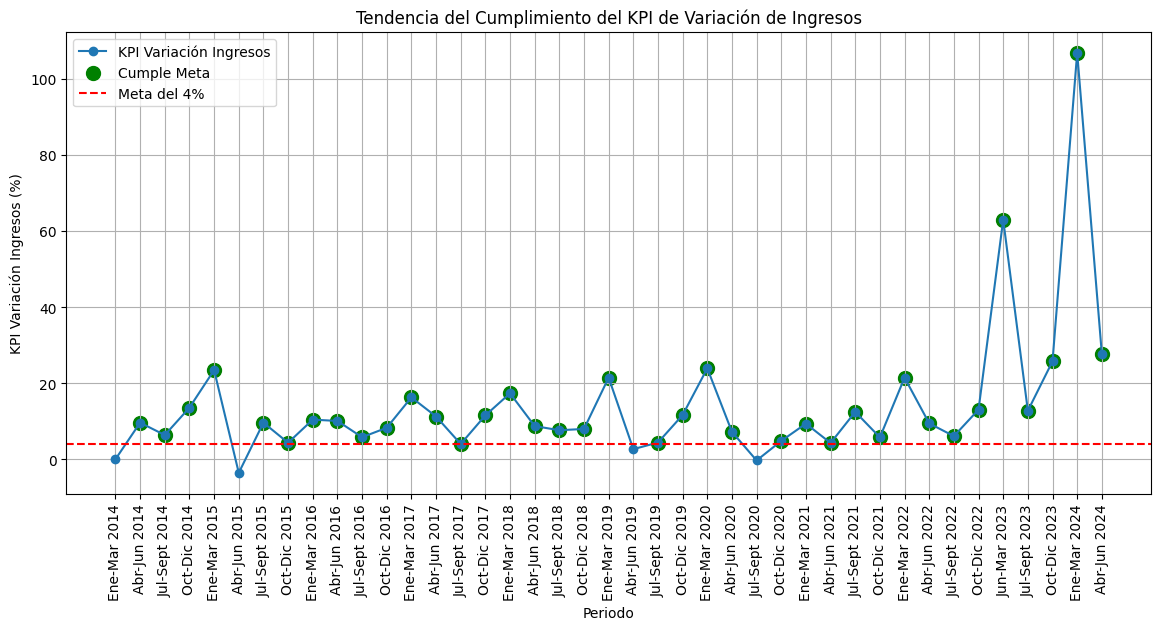

In [36]:
import matplotlib.pyplot as plt

# Graficar la KPI_Variacion_Ingresos
plt.figure(figsize=(14, 6))
plt.plot(df_ingresos['Periodo'], df_ingresos['KPI_Variacion_Ingresos'], label='KPI Variación Ingresos', marker='o')

# Destacar los trimestres que cumplen con la meta
cumplimiento = df_ingresos['KPI_Variacion_Ingresos'] >= 4.0
plt.scatter(df_ingresos['Periodo'][cumplimiento], df_ingresos['KPI_Variacion_Ingresos'][cumplimiento], color='green', label='Cumple Meta', s=100)

# Configurar detalles del gráfico
plt.axhline(y=4.0, color='red', linestyle='--', label='Meta del 4%')
plt.title('Tendencia del Cumplimiento del KPI de Variación de Ingresos')
plt.xlabel('Periodo')
plt.ylabel('KPI Variación Ingresos (%)')
plt.xticks(rotation=90)  # Girar las etiquetas del eje x
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()



El gráfico muestra la tendencia trimestral de la variación de ingresos en relación a la meta del 4%. La línea azul representa los cambios porcentuales, mientras que la línea roja indica la meta. Los puntos verdes destacan los trimestres que cumplen o superan el 4%. Observamos que, aunque la mayoría de los trimestres cumplen la meta, hay fluctuaciones con algunos períodos por debajo del objetivo. Se identifican picos notables en 2023 y 2024, lo que sugiere incrementos excepcionales. Algunos trimestres muestran variaciones negativas o cercanas a cero, lo que podría indicar una caída o estancamiento en los ingresos.

### **Análisis General**
El análisis de los ingresos por servicios de internet entre 2014 y 2024, ajustado por inflación, revela una tendencia general de crecimiento con fluctuaciones en ciertos periodos. El cálculo del KPI de variación de ingresos busca identificar si el incremento trimestral es igual o superior al 4%. Al observar la serie temporal, se destacan periodos con aumentos significativos y otros con variaciones por debajo de la meta, lo que indica un comportamiento mixto. Además, la estacionalidad y eventos externos, como la pandemia de COVID-19 en 2020, han jugado un papel importante en la dinámica de ingresos.

### **Conclusiones**
- **Cumplimiento del KPI**: En varios trimestres, el KPI superó la meta del 4%, lo que sugiere un crecimiento saludable en determinados periodos. Sin embargo, también hay trimestres con bajo crecimiento o caídas.
- **Estacionalidad**: Se observa un patrón estacional en algunos trimestres, con picos recurrentes de crecimiento. Esto implica que los ingresos pueden estar influenciados por factores estacionales como períodos de mayor consumo.
- **Impacto de factores externos**: El año 2020 muestra un aumento significativo en los ingresos, probablemente impulsado por la mayor demanda durante el confinamiento. Este es un ejemplo de cómo los factores externos pueden influir en el comportamiento del mercado.

### **Recomendaciones**
1. **Aprovechar la estacionalidad**: Identificar los trimestres de mayor crecimiento histórico y desarrollar estrategias de marketing y promociones alineadas con estos periodos para maximizar los ingresos.
2. **Planificación estratégica ante factores externos**: Incluir escenarios de planificación que consideren crisis o eventos extraordinarios para mantener la estabilidad y fomentar el crecimiento durante periodos de incertidumbre.
3. **Monitoreo constante de KPIs**: Mantener un análisis periódico de los KPIs de ingresos y accesos para ajustar las estrategias de manera ágil y responder a las tendencias del mercado.
4. **Inversión en infraestructura**: Impulsar la inversión en mejoras tecnológicas para mantener el ritmo de crecimiento y responder a la creciente demanda, especialmente en contextos de alta demanda como en 2020.

#### **Guardar el DataFrame**

Cree un nuevo data para usarlo después, lo llamé  "df_ingresos".

In [37]:
# Guardar el DataFrame con el KPI calculado en la ruta especificada
df_ingresos.to_csv(r'C:\Users\NOTEBOOK\Desktop\Proyecto_ConectandoArgentina\Datasets\DatasetsKpis\Ingresos .csv', index=False)